<a href="https://colab.research.google.com/github/SuryARavichan/PYTHON-FOR-DATA-SCIENCE-BDA-/blob/main/Regularization_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(36.5-42)/(4.2/np.sqrt(2000))

-58.56368512499449

In [ ]:
[36.5-1.96*(4.2/np.sqrt(2000)),36.5+1.96*(4.2/np.sqrt(2000))]

[36.315926884092214, 36.684073115907786]

In [ ]:
X=np.array([1,1,1,1,0,0,0])
Y=np.array([15480,10200,15500,10200,5400,5000,4000])
df=pd.DataFrame({'Reviews':X,'Viewership':Y})
df

,Reviews,Viewership
0,1,15480
1,1,10200
2,1,15500
3,1,10200
4,0,5400
5,0,5000
6,0,4000


In [ ]:
df[df['Reviews']==0]

,Reviews,Viewership
4,0,5400
5,0,5000
6,0,4000


In [ ]:
df[df['Reviews']==0]['Viewership'].mean()

4800.0

In [ ]:
df[df['Reviews']==1]

,Reviews,Viewership
0,1,15480
1,1,10200
2,1,15500
3,1,10200


In [ ]:
df[df['Reviews']==1]['Viewership'].mean()

12845.0

In [ ]:
12845-4800

8045

In [ ]:
y_pred=4800+8045*df['Reviews']

Cross check the answer using OLS and Sklearn package

In [ ]:
Xc=sm.add_constant(X)

In [ ]:
model=sm.OLS(Y,Xc).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     19.11
Date:                Sat, 03 Dec 2022   Prob (F-statistic):            0.00721
Time:                        04:49:23   Log-Likelihood:                -63.265
No. Observations:                   7   AIC:                             130.5
Df Residuals:                       5   BIC:                             130.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4800.0000   1391.026      3.451      0.018    1224.254    8375.746
x1          8045.0000   1840.154      4.372      0.007    3314.732    1.28e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.299
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.546
Skew:                          -0.005   Prob(JB):                        0.761
Kurtosis:                       1.631   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
LR=LinearRegression()
X_new=df[['Reviews']]

In [ ]:
LR.fit(X_new,Y)

LinearRegression()

In [ ]:
LR.coef_

array([8045.])

In [ ]:
LR.intercept_

4800.0

In [ ]:
X=np.array(['pos','neu','pos','neu','neg','neg','neg'])
Y=np.array([15480,10200,15500,10200,5400,5000,4000])
df2=pd.DataFrame({'Reviews':X,'Viewership':Y})
df2

,Reviews,Viewership
0,pos,15480
1,neu,10200
2,pos,15500
3,neu,10200
4,neg,5400
5,neg,5000
6,neg,4000


In [ ]:
R=pd.get_dummies(df2['Reviews'],drop_first=True)
R

,neu,pos
0,0,1
1,1,0
2,0,1
3,1,0
4,0,0
5,0,0
6,0,0


In [ ]:
Rc=sm.add_constant(R)

In [ ]:
model2=sm.OLS(Y,Rc).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     267.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           5.52e-05
Time:                        05:13:08   Log-Likelihood:                -51.614
No. Observations:                   7   AIC:                             109.2
Df Residuals:                       4   BIC:                             109.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4800.0000    294.420     16.303      0.000    3982.558    5617.442
neu         5400.0000    465.519     11.600      0.000    4107.511    6692.489
pos         1.069e+04    465.519     22.964      0.000    9397.511     1.2e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.462
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                          -0.718   Prob(JB):                        0.714
Kurtosis:                       3.499   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
LR2=LinearRegression()

In [ ]:
LR2.fit(R,Y)

LinearRegression()

In [ ]:
LR2.intercept_

4799.999999999999

In [ ]:
LR2.coef_

array([ 5400., 10690.])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
A=pd.read_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/bc_data.csv',index_col=0)
A.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
A.shape

(569, 31)

In [ ]:
A.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
X=A.drop(['diagnosis','area_mean'],axis=1)
Y=A['area_mean']

In [ ]:
X.shape,Y.shape

((569, 29), (569,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
#Feature Selection by Recursive Backward Elimination
cols=list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model_full = sm.OLS(Y,Xc).fit()
    p = pd.Series(model_full.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols


In [ ]:
print(selected_features)

['radius_mean', 'smoothness_mean', 'compactness_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se', 'points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'points_worst', 'symmetry_worst']


In [ ]:
X_new=X[selected_features]
X_new.shape

(569, 20)

In [ ]:
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

In [ ]:
LR=LinearRegression()

In [ ]:
X_std=sc.fit_transform(X_new)

In [ ]:
LR.fit(X_std,Y)

LinearRegression()

In [ ]:
LR.coef_

array([ 412.12692108,   -7.38729914,  -15.30439433,   12.53811093,
         -3.2027684 ,    8.49398525,   13.89966023,   -4.41882573,
         36.26333162,  -23.81299879,    2.89974781,    7.17250885,
        -19.67485292, -307.23666263,    2.8861658 ,  -51.2866793 ,
        276.91613361,    8.01891255,   14.64639613,    4.66528565])

In [ ]:
X_new.columns

Index(['radius_mean', 'smoothness_mean', 'compactness_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se', 'points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'points_worst', 'symmetry_worst'],
      dtype='object')

In [ ]:
coef_df=pd.DataFrame({'features':X_new.columns,'slopes':LR.coef_})
coef_df

,features,slopes
0,radius_mean,412.126921
1,smoothness_mean,-7.387299
2,compactness_mean,-15.304394
3,points_mean,12.538111
4,symmetry_mean,-3.202768
5,dimension_mean,8.493985
6,radius_se,13.899660
7,texture_se,-4.418826
8,perimeter_se,36.263332
9,area_se,-23.812999


In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(LR,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 26.262673905697067
Var Error 14.7598822204747


In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
Rd_tuned=Ridge(alpha=1.07)
scores=cross_val_score(Rd_tuned,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 28.738253321514936
Var Error 10.707817624823452


In [ ]:
(14.75-10.70)/14.75

0.27457627118644073

In [ ]:
(28.73-26.26)/28.73

0.08597285067873299

In [ ]:
R.fit(X_std,Y)

Ridge(alpha=0.5)

In [ ]:
coef_R=pd.DataFrame({'features':X_new.columns,'slopes':R.coef_})
coef_R

,features,slopes
0,radius_mean,370.208598
1,smoothness_mean,-7.484652
2,compactness_mean,-16.785954
3,points_mean,22.991976
4,symmetry_mean,-2.061958
5,dimension_mean,9.236770
6,radius_se,-15.450768
7,texture_se,-2.797427
8,perimeter_se,41.324885
9,area_se,1.822719


In [ ]:
Rd_bias=[]
Rd_var=[]
for i in np.arange(0.01,2,0.01):
  Rd=Ridge(alpha=i)
  scores=cross_val_score(Rd,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
  Rd_bias.append(np.mean(np.abs(scores)))
  Rd_var.append(np.std(np.abs(scores),ddof=1))

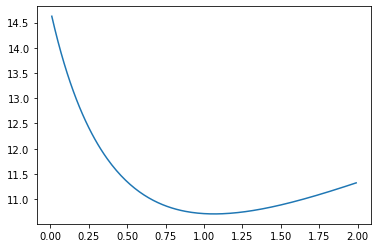

In [ ]:
x_axis=np.arange(0.01,2,0.01)
plt.plot(x_axis,Rd_var)

In [ ]:
np.min(Rd_var)

(10.707817624823452, 106)

In [ ]:
Rd_bias[np.argmin(Rd_var)]

28.738253321514936

In [ ]:
x_axis[np.argmin(Rd_var)]

1.07

In [ ]:
(26.56-26.26)/26.56

0.01129518072289146

In [ ]:
(14.75-11.34)/14.75

0.23118644067796612

In [ ]:
Rd=Ridge()
Rd_param={'alpha':np.arange(0.01,1,0.01)}
GS=GridSearchCV(Rd,Rd_param,scoring='neg_root_mean_squared_error',cv=kf)
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_root_mean_squared_error')

In [ ]:
GS.best_params_

{'alpha': 0.17}

In [ ]:
Rd=Ridge(alpha=.03)

In [ ]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores=cross_val_score(Rd,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 21.29070421508594
Var Error 5.419233034958929


In [ ]:
Ls=Lasso()
Ls_param={'alpha':np.arange(0.01,1,0.01)}
GS=GridSearchCV(Ls,Ls_param,scoring='neg_root_mean_squared_error',cv=kf)
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_root_mean_squared_error')

In [ ]:
GS.best_params_

{'alpha': 0.01}

In [ ]:
Ls=Lasso(alpha=0.01)

In [ ]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores=cross_val_score(Ls,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 21.652584759306883
Var Error 5.606860155112384


In [ ]:
En=ElasticNet()
En_param={'alpha':np.arange(0.01,1,0.01),'l1_ratio':np.arange(0.01,1,.01)}
GS=GridSearchCV(En,En_param,scoring='neg_root_mean_squared_error',cv=kf)
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0...
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_root_mean_squared_error')

In [ ]:
GS.best_params_

{'alpha': 0.01, 'l1_ratio': 0.99}

In [ ]:
En=ElasticNet(alpha=0.01,l1_ratio=0.99)

In [ ]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores=cross_val_score(En,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 21.307569089881135
Var Error 5.4520729143506905
